## "Статистика. Практика"


- Задание 1
Набор данных о видеоиграх (файл "04_vgsales.csv" прилагается).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?

2) Критикам нравятся больше игры на PC или на PS4?

3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

1) сформулируйте нулевую и альтернативную гипотезы;

2) выберите пороговый уровень статистической значимости;

3) опишите полученные результаты статистического теста.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games = pd.read_csv('04_vgsales.csv')
sport_games = games.loc[games['Genre'] == 'Sports']
sport_games['Critic_Score'].min(), sport_games['Critic_Score'].max()

(19.0, 98.0)

In [3]:
# Вопрос 1: Как критики относятся к спортивным играм?
# H0: средняя удовлетворенность критиков спортивными играми <= 75%
# H1: средняя удовлетворенность критиков спортивными играми более 75%

In [4]:
alpha = 0.05
result = stats.ttest_1samp(sport_games['Critic_Score'], 75, alternative='greater')

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, средняя оценка больше 75 (высокий уровень отношения критиков')
else:
    print('Не отвергаем нулевую нулевую гипотезу, средняя оценка 75 или ниже (низкий уровень отношения критиков)')

Не отвергаем нулевую нулевую гипотезу, средняя оценка 75 или ниже (низкий уровень отношения критиков)


In [5]:
# Вывод: отнощение критиков к спортивным играм неблагосклонное (средняя оценка ниже 75)

In [6]:
# Вопрос 2: Критикам нравятся больше игры на PC или на PS4?
# H0: Критикам одинаково нравятся игры на PC и на PS4
# H1: Критикам не одинаково нравятся игры на PC и на PS4 (одна из категорий нравится больше другой)

In [7]:
pc_games = games.loc[games['Platform'] == 'PC']
pc_games = pc_games.loc[:,['Name', 'Platform', 'Critic_Score']]
# pc_games = pc_games.dropna()

ps4_games = games.loc[games['Platform'] == 'PS4']
ps4_games = ps4_games.loc[:,['Name', 'Platform', 'Critic_Score']]
# ps4_games = ps4_games.dropna()

t , p  = stats.ttest_ind(pc_games['Critic_Score'], ps4_games['Critic_Score'], equal_var=False, nan_policy='omit')
t , p

(4.3087588262138725, 2.0672491572827482e-05)

In [8]:
alpha = 0.05

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0 - критикам игры на разных платформах нравятся одинаково)')
else:
    print('Разное распределение (отклоняем H0 - игры на одной из платформ нравятся больше, чем на другой)')

Разное распределение (отклоняем H0 - игры на одной из платформ нравятся больше, чем на другой)


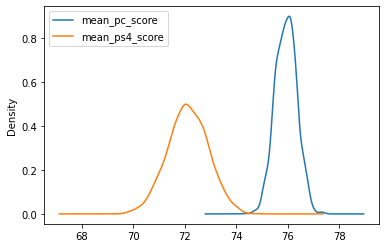

In [9]:
# бутстреппинг из 2000 выборок:

boot_pc = []
boot_ps4 = []
for i in range(2000):
    boot_mean_pc = pc_games['Critic_Score'].sample(frac = 1, replace = True).mean()  
    boot_pc.append(boot_mean_pc)
    boot_mean_ps4 = ps4_games['Critic_Score'].sample(frac = 1, replace = True).mean() 
    boot_ps4.append(boot_mean_ps4)

boot_1d = {'mean_pc_score': boot_pc, 'mean_ps4_score': boot_ps4}
boot_1d = pd.DataFrame(boot_1d)
   
boot_1d.plot(kind='density')

In [10]:
# Вывод: критикам игры на PC нравятся больше, чем на PS4

In [11]:
# Вопрос 3: Критикам больше нравятся стрелялки или стратегии?
# H0: Критикам одинаково нравятся стрелялки и стратегии
# H1: Один из этих жанров нраится критикам больеш другого

In [12]:
shooter_games = games.loc[games['Genre'] == 'Shooter']
shooter_games = shooter_games.loc[:,['Name', 'Genre', 'Critic_Score']]
# shooter_games = shooter_games.dropna()

strategy_games = games.loc[games['Genre'] == 'Strategy']
strategy_games = strategy_games.loc[:,['Name', 'Genre', 'Critic_Score']]
# strategy_games = strategy_games.dropna()

t , p  = stats.ttest_ind(shooter_games['Critic_Score'], strategy_games['Critic_Score'], equal_var=False, nan_policy='omit')
t , p

(-2.2972408230640315, 0.021938989522305212)

In [13]:
alpha = 0.05

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0, один из жарнов нравится больше другого)')

Разное распределение (отклоняем H0, один из жарнов нравится больше другого)


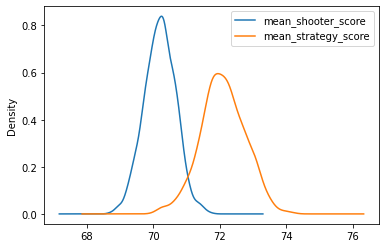

In [14]:

# бутстреппинг из 2000 выборок:

boot_shooter = []
boot_strategy = []
for i in range(2000):
    boot_mean_shooter = shooter_games['Critic_Score'].sample(frac = 1, replace = True).mean()  
    boot_shooter.append(boot_mean_shooter)
    boot_mean_strategy = strategy_games['Critic_Score'].sample(frac = 1, replace = True).mean() 
    boot_strategy.append(boot_mean_strategy)

boot_1d = {'mean_shooter_score': boot_shooter, 'mean_strategy_score': boot_strategy}
boot_1d = pd.DataFrame(boot_1d)
   
boot_1d.plot(kind='density')

In [15]:
# Вывод: критикам стратегии нравятся больше, чем шутеры

- Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные - файл "04_spam.csv") по признаку спама. 

Для этого:

1) Привидите весь текст к нижнему регистру;

2) Удалите мусорные символы;

3) Удалите стоп-слова;

4) Привидите все слова к нормальной форме;

5) Преобразуйте все сообщения в вектора TF-IDF.

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from gensim import corpora
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [18]:
df = pd.read_csv('04_spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
def clean_message(message):
    '''
    преобразование текста (удаление stopwords, приведение форм слов к нормальным)
    '''
    list_words = message.split()
    stop_words = set(stopwords.words('english'))
    wordnet_lemmatizer = WordNetLemmatizer()
    list_words_clean = []

    for word in list_words:
        if word in stop_words:
            list_words.remove(word)
        else:
            list_words_clean.append(wordnet_lemmatizer.lemmatize(word))
    
    message_clean = ' '.join(list_words_clean)
    
    return message_clean

In [20]:
def get_tfidf(df):
    '''
    модель TF-IDF (получение df с раскладкой на векторы)
    '''
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(df.Message)
    names = tfidf.get_feature_names()
    tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
    return tfidf_matrix

In [21]:
def rename_category(category):
    '''
    преобразование категорий из текста в числовое представление (+ обратное преобразование)
    '''
    if category == 'spam':
        return 0
    elif category == 'ham':
        return 1
    else:
        return False

In [22]:
df['Message'] = df['Message'].apply(lambda msg: msg.lower())
df['Message'] = df['Message'].apply(lambda msg: re.sub('[\W_]+',' ', msg))
df['Message'] = df['Message'].apply(lambda msg: clean_message(msg))
df.head()

,Category,Message
0,ham,go point crazy available bugis n great world l...
1,ham,ok lar joking wif u oni
2,spam,free entry comp fa cup final tkts 21st may 200...
3,ham,u dun say hor u c already
4,ham,nah around


In [23]:
df = pd.concat([df, get_tfidf(df)], axis=1)
df.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Category,Message,00,000,000pes,008704050406,0121,01223585236,01223585334,0125698789,...,zero,zhong,zindgi,zoe,zogtorius,zouk,zyada,èn,ú1,〨ud
0,ham,go point crazy available bugis n great world l...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,ok lar joking wif u oni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,free entry comp fa cup final tkts 21st may 200...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,u dun say hor u c already,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,nah around,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
df['Category'] = df['Category'].apply(lambda category: rename_category(category))
df.head()

,Category,Message,00,000,000pes,008704050406,0121,01223585236,01223585334,0125698789,...,zero,zhong,zindgi,zoe,zogtorius,zouk,zyada,èn,ú1,〨ud
0,1,go point crazy available bugis n great world l...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ok lar joking wif u oni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,free entry comp fa cup final tkts 21st may 200...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,u dun say hor u c already,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,nah around,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
df_cat = df['Category']
df = df.drop(['Category', 'Message'], axis=1)

In [26]:
# Создание обучающей и тестовой выборок, обучение модели логистической регрессии

X_train, X_test, y_train, y_test = train_test_split(df, df_cat, test_size=0.25, random_state=42)
print('Размер тестовой выборки: ', len(y_test))

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)

print('Прогноз категорий сообщений:\n', lr.predict(X_test))

Размер тестовой выборки:  1393
Прогноз категорий сообщений:
 [1 1 1 ... 1 1 1]


In [27]:
accuracy_score(y_test, lr.predict(X_test))

0.9468772433596554

In [28]:
# Точность предсказательной модели - 94.6%

In [29]:
# Описание результатов при помощи confusion_matrix

from sklearn.metrics import confusion_matrix

print("Матрица ошибок: \n")
confusion_matrix(y_test, lr.predict(X_test))

Матрица ошибок: 



array([[ 114,   72],
       [   2, 1205]])

In [30]:
# в 114 случаях для сообщений, не являющихся спамом, дан верный прогноз
# в 1205 случаях для сообщений, являющихся спамом, дан верный прогноз
# в 72 случаях для сообщений, являвшихся спамом, дан НЕВЕРНЫЙ прогноз
# в 2 случаях для сообщений, не являющихся спамом, дан НЕВЕРНЫЙ прогноз

In [32]:
# Построение датафрейма со всеми исходными текстами сообщений, классифицированными неправильно (с указанием фактического и предсказанного).

df_wrong = pd.DataFrame([y_test]).T
df_wrong['Predict_category'] = lr.predict(X_test)  # добавление столбца с предсказанными значениями
df_wrong = df_wrong.loc[((df_wrong['Category'] == 0) & (df_wrong['Predict_category'] == 1)) | ((df_wrong['Category'] == 1) & (df_wrong['Predict_category'] == 0))]
df_input = pd.read_csv('04_spam.csv')   # повторно загружаем исходный датафрейм (т.к. ранее удалялись исходные сообщения)
df_wrong = df_wrong.merge(df_input, how='inner', left_index=True, right_index=True)
df_wrong.drop('Category_x', axis=1, inplace=True)
df_wrong['Predict_category'] = df_wrong['Predict_category'].apply(lambda cat: rename_category(cat))
df_wrong

,Predict_category,Category_y,Message
881,False,spam,Reminder: You have not downloaded the content ...
1961,False,spam,Guess what! Somebody you know secretly fancies...
296,False,spam,T-Mobile customer you may now claim your FREE ...
3864,False,spam,Oh my god! I've found your number again! I'm s...
2575,False,spam,Your next amazing xxx PICSFREE1 video will be ...
...,...,...,...
5377,False,spam,The current leading bid is 151. To pause this ...
4888,False,spam,Todays Vodafone numbers ending with 4882 are s...
1456,False,spam,Summers finally here! Fancy a chat or flirt wi...
3132,False,spam,LookAtMe!: Thanks for your purchase of a video...


In [33]:
# 74 записи - совпадает с матрицей ошибок